Code for initial data exploration using Pandas. Also a refresher on numpy and pandas.

Lets open a pupil labs csv

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal

recording_location = r"C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\pupil_labs\002"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

002/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    eye1.intrinsics
    eye1.mp4
    eye1_lookup.npy
    eye1_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    square_marker_cache
    surface_definitions_v01
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            annotations.csv
            blink_detection_report.csv
            blinks.csv
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
  

In [2]:
exported_pupil_csv = os.path.join(recording_location, 'exports', '000', 'pupil_positions.csv')
pupil_pd_frame = pd.read_csv(exported_pupil_csv)
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'gaze_positions.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
annotations_csv = os.path.join(recording_location, 'exports', '000', 'annotations.csv')
annotations_pd = pd.read_csv(annotations_csv)

In [3]:
list(pupil_pd_frame.columns)

['pupil_timestamp',
 'world_index',
 'eye_id',
 'confidence',
 'norm_pos_x',
 'norm_pos_y',
 'diameter',
 'method',
 'ellipse_center_x',
 'ellipse_center_y',
 'ellipse_axis_a',
 'ellipse_axis_b',
 'ellipse_angle',
 'diameter_3d',
 'model_confidence',
 'model_id',
 'sphere_center_x',
 'sphere_center_y',
 'sphere_center_z',
 'sphere_radius',
 'circle_3d_center_x',
 'circle_3d_center_y',
 'circle_3d_center_z',
 'circle_3d_normal_x',
 'circle_3d_normal_y',
 'circle_3d_normal_z',
 'circle_3d_radius',
 'theta',
 'phi',
 'projected_sphere_center_x',
 'projected_sphere_center_y',
 'projected_sphere_axis_a',
 'projected_sphere_axis_b',
 'projected_sphere_angle']

In [5]:
pupil_pd_frame.head()

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,14963.532079,0,0,0.967541,0.384912,0.601413,32.496613,pye3d 0.3.0 real-time,73.903172,76.528654,...,0.018373,-0.853685,1.690155,1.552422,-2.118296,114.033851,78.141415,165.699953,165.699953,0.0
1,14963.532079,0,0,0.967541,0.384946,0.601443,32.499603,2d c++,73.909576,76.522873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14963.532146,0,1,1.000000,0.305218,0.387613,36.263992,2d c++,58.601776,117.578255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14963.532146,0,1,1.000000,0.305221,0.387696,36.252590,pye3d 0.3.0 real-time,58.602380,117.562393,...,-0.166674,-0.782323,1.777172,1.738252,-2.225184,109.252397,126.930874,174.366655,174.366655,0.0
4,14963.540161,1,0,0.968023,0.385050,0.601268,32.357941,pye3d 0.3.0 real-time,73.929623,76.556600,...,0.016104,-0.854217,1.682928,1.554692,-2.117337,114.033851,78.141415,165.699953,165.699953,0.0


In [5]:
from IPython.display import display
%matplotlib inline
# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == '2d c++']

pupil_diameter=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>0.99), ['diameter','pupil_timestamp']]
pupil_diameter['diameter_med']=pupil_diameter['diameter'].rolling(100).median()

filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_events_surprise= annotations_pd['label'].str.contains('Surprise')




In [7]:
pupil_diameter.head()

,diameter,pupil_timestamp,diameter_med
2,36.263992,14963.532146,NaN
6,36.455727,14963.540213,NaN
10,36.510544,14963.548129,NaN
15,36.608551,14963.556179,NaN
16,36.919601,14963.564011,NaN


In [8]:
annotations_pd[filter_events].shape



(49, 4)

In [9]:
annotations_pd.query(filter_events)

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

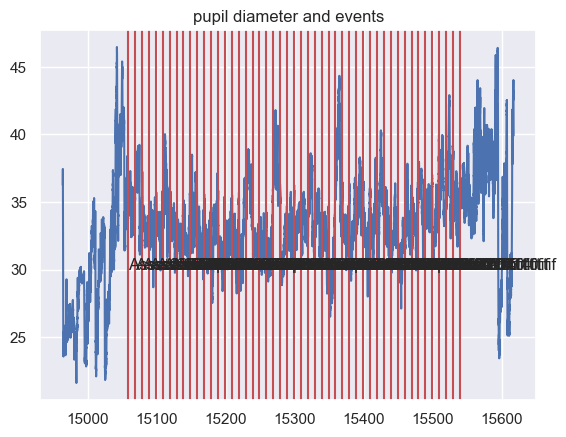

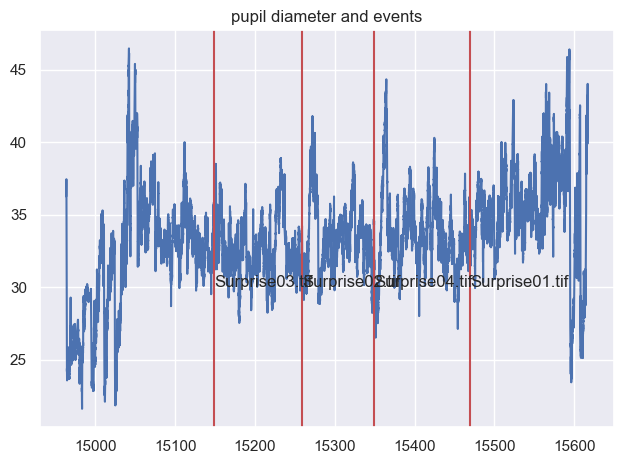

In [6]:
sns.set_theme()
fig, ax=plt.subplots(1,1)
ax.plot(pupil_diameter['pupil_timestamp'],pupil_diameter['diameter'])
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row['timestamp'], color='r', label='axvline - full height')
    ax.text((row['timestamp']),30,row['label'])
ax.set_title('pupil diameter and events')    

fig, ax=plt.subplots(1,1)
ax.plot(pupil_diameter['pupil_timestamp'],pupil_diameter['diameter'])
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row['timestamp'], color='r', label='axvline - full height')
    ax.text((row['timestamp']),30,row['label'])
ax.set_title('pupil diameter and events')    
plt.tight_layout()

In [11]:
sns.set_theme()
fig, ax=plt.subplots(1,1)
ax.plot(pupil_diameter['pupil_timestamp'],pupil_diameter['diameter_med'])
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row['timestamp'], color='r', label='axvline - full height')
    ax.text((row['timestamp']),30,row['label'])
ax.set_title('pupil diameter and events')    

fig, ax=plt.subplots(1,1)
ax.plot(pupil_diameter['pupil_timestamp'],pupil_diameter['diameter_med'])
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row['timestamp'], color='r', label='axvline - full height')
    ax.text((row['timestamp']),30,row['label'])
ax.set_title('pupil diameter and events')    
plt.tight_layout()

In [ ]:
annotations_pd.where(filter_events)

,index,timestamp,label,duration
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,5615.0,15058.336109,Asset0005.tif,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
143,33711.0,15529.120938,Asset0014.tif,NaN
144,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN
146,34309.0,15539.138092,Asset0010.tif,NaN


In [ ]:
(np.diff(annotations_pd[filter_events,['timestamp']]))

InvalidIndexError: (0      False
1      False
2       True
3      False
4      False
       ...  
143     True
144    False
145    False
146     True
147    False
Name: label, Length: 148, dtype: bool, ['timestamp'])

In [ ]:
annotations_pd.loc[filter_events,['timestamp']]

,timestamp
2,15058.336109
5,15068.352719
8,15078.369366
11,15088.386081
14,15098.386203
17,15108.402790
20,15118.419533
23,15128.436262
26,15138.452925
29,15148.470166


In [ ]:
np.diff(annotations_pd['timestamp'])

array([1.9867868 , 2.000127  , 6.02066008, 1.99605192, 1.999898  ,
       6.024616  , 1.991962  , 2.000069  , 6.02396073, 1.99277127,
       1.999983  , 6.014822  , 1.98548   , 1.99982   , 6.02419496,
       1.99236504, 2.000027  , 6.026307  , 1.990477  , 1.999959  ,
       6.02608   , 1.990728  , 1.999921  , 6.023254  , 1.993617  ,
       1.999792  , 6.022602  , 1.994093  , 2.00054596, 6.01503004,
       1.98490908, 1.99971892, 6.028851  , 1.98817608, 1.99955792,
       6.027609  , 1.989044  , 2.000024  , 6.023341  , 1.993637  ,
       1.999738  , 6.025248  , 1.991475  , 2.000095  , 6.024847  ,
       1.992066  , 2.00018596, 6.024518  , 1.99155704, 2.00327669,
       6.02238527, 1.99111004, 2.000081  , 6.027028  , 1.989597  ,
       2.000031  , 6.020009  , 1.996719  , 2.00047696, 6.0274612 ,
       1.99290196, 1.99588287, 6.02644496, 1.99011404, 2.000058  ,
       6.0278442 , 1.98934788, 2.00154512, 6.0219938 , 1.992792  ,
       1.999901  , 6.02811084, 1.98906112, 1.99960204, 6.02781

In [ ]:
a=(annotations_pd.loc[filter_events,['timestamp']]).values


In [16]:
annotations_pd.loc[filter_events,'timestamp'].to_numpy()

array([15058.3361094 , 15068.3527194 , 15078.3693664 , 15088.3860814 ,
       15098.3862034 , 15108.4027904 , 15118.4195334 , 15128.4362624 ,
       15138.4529254 , 15148.47016636, 15158.4698244 , 15168.4864094 ,
       15178.5030864 , 15188.5198024 , 15198.5366204 , 15208.55371936,
       15218.57307109, 15228.5866474 , 15238.6033034 , 15248.62050836,
       15258.6367544 , 15268.6533714 , 15278.6721086 , 15288.6867954 ,
       15298.7035694 , 15308.7201174 , 15318.7538624 , 15328.7881266 ,
       15338.8036414 , 15348.8202714 , 15358.8373234 , 15368.85423148,
       15378.8705114 , 15388.88769248, 15398.9041494 , 15408.9205844 ,
       15418.9372464 , 15428.9539364 , 15438.9707194 , 15448.9874724 ,
       15459.00487532, 15469.0208654 , 15479.0374754 , 15489.0540844 ,
       15499.07354202, 15509.0877354 , 15519.1046144 , 15529.1209384 ,
       15539.1380916 ])

In [17]:
filter_events

0      False
1      False
2       True
3      False
4      False
       ...  
143     True
144    False
145    False
146     True
147    False
Name: label, Length: 148, dtype: bool

Test for intertime interval of Asset and surprise presentation

In [33]:
diff_time=np.diff(annotations_pd['timestamp'])
diff_time_events_aux=annotations_pd[filter_events]
diff_time_events=np.diff(diff_time_events_aux['timestamp'])

fig1,ax1=plt.subplots(1,2)
sns.histplot(data=diff_time,ax= ax1[0],bins=20)
sns.histplot(data=diff_time_events,ax= ax1[1],bins=20)
ax1[0].set_title('Test of time interval for all events in pupil')
ax1[1].set_title('Test of time interval for assets/surprise/control')
fig1.tight_layout()


numpy.ndarray

In [28]:
diff_time_events_aux.iat[2,1]

15078.369366400002

In [13]:
fig, ax=plt.subplots(1,1)
x=annotations_pd.drop(0)['timestamp'].values
y=diff_time
z=annotations_pd.drop(0)['label'].values
ax.plot(x,y,'o')

counter=0
for  x, y,z in zip(x,y,z):
    # plt.axvline(x, color='r', label='axvline - full height')
    # ax.text(x,y,z)
    print(counter)
plt.title('Events pupil')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Text(0.5, 1.0, 'Events pupil')

Lets load some emotbit data

In [340]:
recording_location_emotibit = r'C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\emotibit'
print_file_structure(recording_location_emotibit)

emotibit/
    2023-03-30_12-14-52-213998.csv
    2023-03-30_12-14-52-213998_AK.csv
    2023-03-30_12-14-52-213998_AX.csv
    2023-03-30_12-14-52-213998_AY.csv
    2023-03-30_12-14-52-213998_AZ.csv
    2023-03-30_12-14-52-213998_B%.csv
    2023-03-30_12-14-52-213998_BI.csv
    2023-03-30_12-14-52-213998_BV.csv
    2023-03-30_12-14-52-213998_EA.csv
    2023-03-30_12-14-52-213998_EL.csv
    2023-03-30_12-14-52-213998_EM.csv
    2023-03-30_12-14-52-213998_GX.csv
    2023-03-30_12-14-52-213998_GY.csv
    2023-03-30_12-14-52-213998_GZ.csv
    2023-03-30_12-14-52-213998_HR.csv
    2023-03-30_12-14-52-213998_LM.csv
    2023-03-30_12-14-52-213998_MX.csv
    2023-03-30_12-14-52-213998_MY.csv
    2023-03-30_12-14-52-213998_MZ.csv
    2023-03-30_12-14-52-213998_PG.csv
    2023-03-30_12-14-52-213998_PI.csv
    2023-03-30_12-14-52-213998_PR.csv
    2023-03-30_12-14-52-213998_RB.csv
    2023-03-30_12-14-52-213998_RD.csv
    2023-03-30_12-14-52-213998_SA.csv
    2023-03-30_12-14-52-213998_SF.csv
    2

In [372]:
emo_data='2023-03-30_12-14-52-213998'
eda_csv=os.path.join(recording_location_emotibit,emo_data+'_EA.csv')
eda_pd = pd.read_csv(eda_csv)
annotation_emotibit_csv=os.path.join(recording_location_emotibit,emo_data+'_LM.csv')
annotation_emotibit_pd=pd.read_csv(annotation_emotibit_csv)
annotation_emotibit_pd.tail()


,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,LR,LM,LC,LD,Unnamed: 11
144,1.680176e+09,1434265,41186,8,LM,1,100,15535.150473,15535.150481,15535.172208,blank_48,NaN
145,1.680176e+09,1436274,41525,8,LM,1,100,15537.138539,15537.138541,15537.172490,drift_point_48,NaN
146,1.680176e+09,1438262,41850,8,LM,1,100,15539.137704,15539.137713,15539.155709,Asset0010.tif,NaN
147,1.680176e+09,1444289,42846,8,LM,1,100,15545.169174,15545.169186,15545.188632,EndOfExperiment,NaN
148,1.680176e+09,1517370,54862,8,LM,1,100,15618.220915,15618.220914,15618.254863,Asset0042.tif,NaN


Final stimuly in emotibit is wrong, after end of experiment. It is necessary to remove the last line. Repair stimulation code to solve this problempopowe

In [373]:
annotation_emotibit_pd=annotation_emotibit_pd.drop(148)


In [374]:
filter_events=annotation_emotibit_pd['LD'].str.contains('Asset') | annotation_emotibit_pd['LD'].str.contains('Control') | annotation_emotibit_pd['LD'].str.contains('Surprise')
filter_events_surprise= annotation_emotibit_pd['LD'].str.contains('Surprise')


In [375]:
annotation_emotibit_pd[filter_events]

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,LR,LM,LC,LD,Unnamed: 11
2,1.680175e+09,957470,28085,8,LM,1,100,15058.336204,15058.336217,15058.370694,Asset0005.tif,NaN
5,1.680175e+09,967522,29761,8,LM,1,100,15068.352822,15068.352827,15068.387263,Asset0044.tif,NaN
8,1.680175e+09,977494,31418,8,LM,1,100,15078.369456,15078.369466,15078.387597,Asset0032.tif,NaN
11,1.680175e+09,987543,33059,8,LM,1,100,15088.386219,15088.386228,15088.387500,Asset0030.tif,NaN
14,1.680175e+09,997526,34688,8,LM,1,100,15098.386349,15098.386353,15098.420621,Asset0033.tif,NaN
17,1.680175e+09,1007517,36286,8,LM,1,100,15108.402902,15108.402910,15108.420579,Asset0041.tif,NaN
20,1.680175e+09,1017532,37944,8,LM,1,100,15118.419721,15118.419730,15118.437581,Asset0042.tif,NaN
23,1.680175e+09,1027580,39588,8,LM,1,100,15128.436391,15128.436398,15128.470718,Asset0021.tif,NaN
26,1.680175e+09,1037607,41248,8,LM,1,100,15138.453062,15138.453069,15138.470849,Asset0039.tif,NaN
29,1.680175e+09,1047610,42901,8,LM,1,100,15148.469794,15148.469804,15148.504227,Surprise03.tif,NaN


In [376]:
sns.set_theme()
fig, ax=plt.subplots(1,1)
ax.plot(eda_pd['LocalTimestamp'],eda_pd['EA'])
for  index, row in annotation_emotibit_pd[filter_events_surprise].iterrows():
    plt.axvline(row['LocalTimestamp'], color='r', label='axvline - full height')
    ax.text((row['LocalTimestamp']),4,row['LD'])
ax.set_title('Emotibit EDA and events')   

fig, ax=plt.subplots(1,1)
ax.plot(eda_pd['LocalTimestamp'],eda_pd['EA'])
for  index, row in annotation_emotibit_pd[filter_events].iterrows():
    plt.axvline(row['LocalTimestamp'], color='r', label='axvline - full height')
    ax.text((row['LocalTimestamp']),4,row['LD'])
ax.set_title('Emotibit EDA and events')   


Text(0.5, 1.0, 'Emotibit EDA and events')

In [266]:
annotation_emotibit_pd[filter_events].tail()

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,LR,LM,LC,LD,Unnamed: 11
134,1.680176e+09,1398288,35347,8,LM,1,100,15499.072752,15499.072757,15499.088794,Asset0020.tif,NaN
137,1.680176e+09,1408227,36978,8,LM,1,100,15509.087876,15509.087889,15509.122212,Asset0015.tif,NaN
140,1.680176e+09,1418246,38562,8,LM,1,100,15519.104801,15519.104814,15519.139213,Asset0040.tif,NaN
143,1.680176e+09,1428229,40204,8,LM,1,100,15529.121079,15529.121082,15529.122245,Asset0014.tif,NaN
146,1.680176e+09,1438262,41850,8,LM,1,100,15539.137704,15539.137713,15539.155709,Asset0010.tif,NaN


In [377]:
diff_time=np.diff(annotation_emotibit_pd['LocalTimestamp'])
diff_time_events_aux=annotation_emotibit_pd.loc[filter_events]
diff_time_events=np.diff(diff_time_events_aux['LocalTimestamp'])

fig1,ax1=plt.subplots(1,2)
sns.histplot(data=diff_time,ax= ax1[0],bins=10)
sns.histplot(data=diff_time_events,ax= ax1[1],bins=10)
ax1[0].set_title('Test of time interval for all events in emotibit')
ax1[1].set_title('Test of time interval for assets/surprise/control in emotibit')
fig1.tight_layout()

In [346]:
fig, ax=plt.subplots(1,1)
ax.plot(diff_time,'-o')

In [320]:
1680175117.218057-1680175118.560062

-1.3420050144195557

In [351]:
fig, ax=plt.subplots(1,1)
x=annotation_emotibit_pd.drop(0)['LocalTimestamp'].values
y=diff_time
z=annotation_emotibit_pd.drop(0)['LD'].values
ax.plot(x,y,'o')

counter=0
for  x, y,z in zip(x,y,z):
    # plt.axvline(x, color='r', label='axvline - full height')
    ax.text(x,y,z)
    print(counter)
plt.title('Events emotibit')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Text(0.5, 1.0, 'Events emotibit')

Now lets check things in LSL time


In [331]:
annotation_emotibit_pd.drop(0).loc[0,['LD']]

KeyError: 0

In [312]:
annotation_emotibit_pd['LocalTimestamp']
diff_time

array([1.34200501, 2.00400805, 6.00602198, 2.01400805, 2.03200698,
       5.98502302, 2.02700806, 1.96000695, 6.01202297, 1.99900699,
       2.03800797, 6.00402308, 1.97100687, 2.00800705, 6.005023  ,
       2.01400805, 1.97200704, 6.04102302, 2.00100803, 1.97300696,
       6.04802299, 2.00900698, 1.99100804, 6.01602197, 2.02300787,
       1.98800802, 6.00802207, 1.98900795, 2.00600696, 5.99702311,
       2.00600791, 1.9810071 , 6.01802301, 2.00500703, 2.01200795,
       5.99602199, 2.00700808, 2.03200793, 5.97902203, 2.00700808,
       1.99000692, 6.02702308, 2.0160079 , 1.99300694, 6.005023  ,
       2.03500795, 1.9500072 , 6.03402281, 2.00300717, 2.00200796,
       6.05402303, 1.94700694, 2.02200794, 6.02002215, 1.9910078 ,
       2.01700711, 6.02502298, 1.97200799, 2.00600696, 6.03502297,
       1.96200705, 2.00200796, 6.02002311, 2.01300693, 2.00400805,
       6.01502299, 1.97200704, 2.00600696, 6.04202294, 2.02800798,
       1.94200706, 6.03502297, 2.00400805, 1.99400687, 6.06002

In [304]:
annotation_emotibit_pd.loc[0,['LocalTimestamp']]


LocalTimestamp    1680175117.218057
Name: 0, dtype: object

In [132]:
annotations_pd.loc[filter_events,['timestamp']]

,timestamp
2,15058.336109
5,15068.352719
8,15078.369366
11,15088.386081
14,15098.386203
17,15108.402790
20,15118.419533
23,15128.436262
26,15138.452925
29,15148.470166


In [120]:
annotations_pd

,index,timestamp,label,duration
0,5377,15054.349196,blank_0,NaN
1,5496,15056.335982,drift_point_0,NaN
2,5615,15058.336109,Asset0005.tif,NaN
3,5974,15064.356769,blank_1,NaN
4,6093,15066.352821,drift_point_1,NaN
...,...,...,...,...
143,33711,15529.120938,Asset0014.tif,NaN
144,34071,15535.150318,blank_48,NaN
145,34190,15537.138403,drift_point_48,NaN
146,34309,15539.138092,Asset0010.tif,NaN


In [87]:
for  index,row in annotations_pd.where(filter_events).iterrows():
   print(row['timestamp'])


nan
nan
15058.3361094
nan
nan
15068.352719400002
nan
nan
15078.369366400002
nan
nan
15088.386081400002
nan
nan
15098.3862034
nan
nan
15108.4027904
nan
nan
15118.4195334
nan
nan
15128.436262400002
nan
nan
15138.4529254
nan
nan
15148.470166363762
nan
nan
15158.4698244
nan
nan
15168.486409400002
nan
nan
15178.503086400002
nan
nan
15188.519802400002
nan
nan
15198.536620400002
nan
nan
15208.55371936376
nan
nan
15218.573071089104
nan
nan
15228.5866474
nan
nan
15238.6033034
nan
nan
15248.62050836376
nan
nan
15258.636754400002
nan
nan
15268.653371400002
nan
nan
15278.67210860218
nan
nan
15288.6867954
nan
nan
15298.7035694
nan
nan
15308.720117400002
nan
nan
15318.7538624
nan
nan
15328.78812660218
nan
nan
15338.803641400002
nan
nan
15348.820271400002
nan
nan
15358.8373234
nan
nan
15368.854231482972
nan
nan
15378.870511400002
nan
nan
15388.887692482973
nan
nan
15398.9041494
nan
nan
15408.9205844
nan
nan
15418.9372464
nan
nan
15428.9539364
nan
nan
15438.970719400002
nan
nan
15448.987472400002
nan


In [75]:
annotations_pd

,index,timestamp,label,duration
0,5377,15054.349196,blank_0,NaN
1,5496,15056.335982,drift_point_0,NaN
2,5615,15058.336109,Asset0005.tif,NaN
3,5974,15064.356769,blank_1,NaN
4,6093,15066.352821,drift_point_1,NaN
...,...,...,...,...
143,33711,15529.120938,Asset0014.tif,NaN
144,34071,15535.150318,blank_48,NaN
145,34190,15537.138403,drift_point_48,NaN
146,34309,15539.138092,Asset0010.tif,NaN


In [60]:
for  vline in annotations_pd.where(filter_events):
    print(type(vline))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [67]:
annotations_pd[filter_events].shape


(49, 4)

In [ ]:
pupil_pd_frame.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>0.99),['world_index','confidence']].head()


In [ ]:
(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>0.95)

In [ ]:
gaze_data[~gaze_data['gaze_normal0_x'].isna()]

In [ ]:
gaze_data.where()

In [ ]:

gaze_pd_frame.loc[gaze_pd_frame['gaze_normal0_x'].isna(),'norm_pos_x','base_data'].head()


In [ ]:
gaze_pd_frame.loc[gaze_pd_frame['gaze_normal0_x'].isna(),'norm_pos_x','base_data'].head()


In [ ]:
gaze_data.iloc[0:1,0:1]

In [ ]:
gaze_data.iloc[0:3, 3] = "anonymous"

In [ ]:
gaze_data

Basic Statistwics   

In [ ]:
gaze_data.describe()

What about for each eye

In [ ]:
gaze_data.groupby('eye_id').describe()

In [ ]:
gaze_data['norm_pos_x'].plot()

Lets check the quick plots available in pandas

In [ ]:
[method_name for method_name in dir(gaze_data.plot) if not method_name.startswith("_")]

In [ ]:
gaze_data['diameter'].plot.box()

gaze_data.

In [ ]:
I want each of the columns in a separate subplot.

